### WLASL Model Evaluation and Downscaling

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
path_wlasl = "/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/models/checkpoints/mvit_acc_0.06_20251019_032505.pth"


In [2]:
import torch
torch.load(path_wlasl)


OrderedDict([('conv_proj.weight',
              tensor([[[[[-4.2490e-02,  1.4821e-02, -6.0546e-02,  ..., -4.3448e-02,
                          -4.5957e-02, -4.2990e-02],
                         [-5.2844e-02,  5.1302e-03, -1.6082e-02,  ...,  8.3058e-05,
                           2.5294e-02, -4.0437e-02],
                         [-4.2122e-02, -4.0570e-03,  2.7691e-02,  ..., -2.1683e-02,
                          -3.7694e-02,  2.0314e-02],
                         ...,
                         [-1.9074e-02, -5.8698e-02,  1.2550e-02,  ...,  3.4525e-02,
                          -5.2147e-02, -4.1639e-02],
                         [ 3.3587e-03,  2.9572e-02, -1.1253e-02,  ...,  2.8290e-02,
                           2.4263e-02,  1.1952e-02],
                         [-5.8405e-02,  1.7062e-02,  8.3825e-03,  ..., -5.1943e-02,
                          -1.6633e-02, -5.0430e-02]],
              
                        [[-1.7461e-02, -9.3146e-03, -1.0758e-02,  ..., -5.6137e-03,
              

In [76]:
import sys, os, torch

# 🧩 Add your "src" folder to Python's import path_wlasl
sys.path.append("/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/src")

# 🧠 Now import your model definition
from video_model_definition import create_mvit_model


In [3]:
# Load checkpoint
checkpoint = torch.load(path_wlasl, map_location="cpu")

print("✅ Checkpoint loaded successfully.")
print("Type:", type(checkpoint))
if isinstance(checkpoint, dict):
    print("Keys:", checkpoint.keys())


✅ Checkpoint loaded successfully.
Type: <class 'collections.OrderedDict'>
Keys: odict_keys(['conv_proj.weight', 'conv_proj.bias', 'pos_encoding.class_token', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.attn.rel_pos_h', 'blocks.0.attn.rel_pos_w', 'blocks.0.attn.rel_pos_t', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.qkv.bias', 'blocks.0.attn.project.0.weight', 'blocks.0.attn.project.0.bias', 'blocks.0.attn.pool_q.pool.weight', 'blocks.0.attn.pool_q.norm_act.0.weight', 'blocks.0.attn.pool_q.norm_act.0.bias', 'blocks.0.attn.pool_k.pool.weight', 'blocks.0.attn.pool_k.norm_act.0.weight', 'blocks.0.attn.pool_k.norm_act.0.bias', 'blocks.0.attn.pool_v.pool.weight', 'blocks.0.attn.pool_v.norm_act.0.weight', 'blocks.0.attn.pool_v.norm_act.0.bias', 'blocks.0.mlp.0.weight', 'blocks.0.mlp.0.bias', 'blocks.0.mlp.3.weight', 'blocks.0.mlp.3.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.norm2.weight', 'blocks.1.norm2.bias',

In [5]:
import torch
import torch.nn as nn
from torchvision.models.video import mvit_v2_s

# --- Load checkpoint ---
path_wlasl_wlasl_wlasl_wlasl_wlasl_wlasl_wlasl = "/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/models/checkpoints/mvit_acc_0.06_20251019_032505.pth"
state_dict = torch.load(path_wlasl, map_location="cpu")

# --- Detect how many output classes the checkpoint was trained for ---
num_classes_ckpt = state_dict["head.1.weight"].shape[0]
print(f"Checkpoint trained for {num_classes_ckpt} classes")

# --- Recreate same base model ---
model = mvit_v2_s(weights=None)
in_features = model.head[1].in_features

# --- Replace classification head to match checkpoint ---
model.head[1] = nn.Linear(in_features, num_classes_ckpt)

# --- Load weights ---
missing, unexpected = model.load_state_dict(state_dict, strict=False)
print(f"✅ Model loaded. Missing: {len(missing)} | Unexpected: {len(unexpected)}")

model.eval()


Checkpoint trained for 1990 classes
✅ Model loaded. Missing: 0 | Unexpected: 0


MViT(
  (conv_proj): Conv3d(3, 96, kernel_size=(3, 7, 7), stride=(2, 4, 4), padding=(1, 3, 3))
  (pos_encoding): PositionalEncoding()
  (blocks): ModuleList(
    (0): MultiscaleBlock(
      (norm1): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (norm2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (attn): MultiscaleAttention(
        (qkv): Linear(in_features=96, out_features=288, bias=True)
        (project): Sequential(
          (0): Linear(in_features=96, out_features=96, bias=True)
        )
        (pool_q): Pool(
          (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=96, bias=False)
          (norm_act): Sequential(
            (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          )
        )
        (pool_k): Pool(
          (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
          (norm_act): Sequential(
            (0): LayerNorm((96,

In [6]:
print(model)
print("\nModel dtype:", next(model.parameters()).dtype)

# Parameter counts
total = sum(p.numel() for p in model.parameters())
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total:,}, Trainable: {trainable:,}")


MViT(
  (conv_proj): Conv3d(3, 96, kernel_size=(3, 7, 7), stride=(2, 4, 4), padding=(1, 3, 3))
  (pos_encoding): PositionalEncoding()
  (blocks): ModuleList(
    (0): MultiscaleBlock(
      (norm1): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (norm2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (attn): MultiscaleAttention(
        (qkv): Linear(in_features=96, out_features=288, bias=True)
        (project): Sequential(
          (0): Linear(in_features=96, out_features=96, bias=True)
        )
        (pool_q): Pool(
          (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=96, bias=False)
          (norm_act): Sequential(
            (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          )
        )
        (pool_k): Pool(
          (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
          (norm_act): Sequential(
            (0): LayerNorm((96,

In [7]:
print(model)
print("\nModel precision:", next(model.parameters()).dtype)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


MViT(
  (conv_proj): Conv3d(3, 96, kernel_size=(3, 7, 7), stride=(2, 4, 4), padding=(1, 3, 3))
  (pos_encoding): PositionalEncoding()
  (blocks): ModuleList(
    (0): MultiscaleBlock(
      (norm1): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (norm2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (attn): MultiscaleAttention(
        (qkv): Linear(in_features=96, out_features=288, bias=True)
        (project): Sequential(
          (0): Linear(in_features=96, out_features=96, bias=True)
        )
        (pool_q): Pool(
          (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=96, bias=False)
          (norm_act): Sequential(
            (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          )
        )
        (pool_k): Pool(
          (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
          (norm_act): Sequential(
            (0): LayerNorm((96,

In [8]:
print(model.blocks[0].attn)


MultiscaleAttention(
  (qkv): Linear(in_features=96, out_features=288, bias=True)
  (project): Sequential(
    (0): Linear(in_features=96, out_features=96, bias=True)
  )
  (pool_q): Pool(
    (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=96, bias=False)
    (norm_act): Sequential(
      (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
    )
  )
  (pool_k): Pool(
    (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
    (norm_act): Sequential(
      (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
    )
  )
  (pool_v): Pool(
    (pool): Conv3d(96, 96, kernel_size=(3, 3, 3), stride=(1, 8, 8), padding=(1, 1, 1), groups=96, bias=False)
    (norm_act): Sequential(
      (0): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
    )
  )
)


Combined QKV shape: (288, 96)


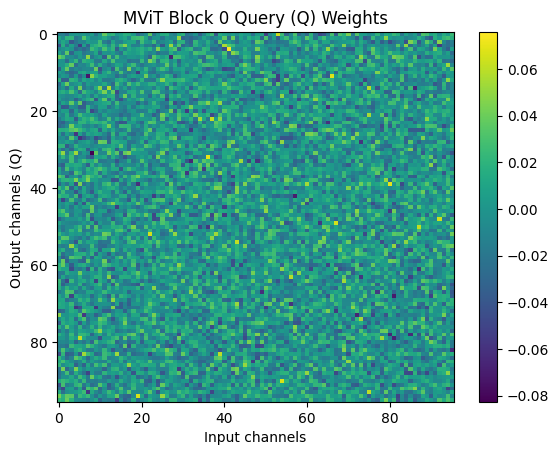

In [9]:
import matplotlib.pyplot as plt
import torch

attn = model.blocks[0].attn

# The combined QKV projection
w_qkv = attn.qkv.weight.detach().cpu().numpy()
print("Combined QKV shape:", w_qkv.shape)  # (288, 96)

# Split into Q, K, V parts
embed_dim = attn.qkv.in_features     # 96
per_part = attn.qkv.out_features // 3  # 96
w_q = w_qkv[:per_part, :]
w_k = w_qkv[per_part:2*per_part, :]
w_v = w_qkv[2*per_part:, :]

# Visualize query weights
plt.imshow(w_q, cmap='viridis', aspect='auto')
plt.title("MViT Block 0 Query (Q) Weights")
plt.xlabel("Input channels")
plt.ylabel("Output channels (Q)")
plt.colorbar()
plt.show()


pool_q filter shape: torch.Size([96, 1, 3, 3, 3])


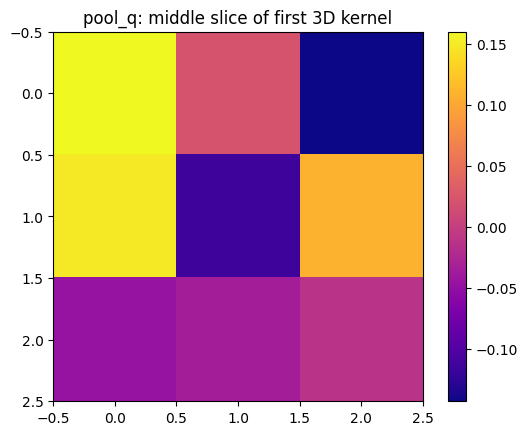

In [10]:
pool_q_weights = attn.pool_q.pool.weight.detach().cpu()
print("pool_q filter shape:", pool_q_weights.shape)  # (96, 1, 3, 3, 3)

# Visualize the middle slice of the first channel
plt.imshow(pool_q_weights[0, 0, 1].numpy(), cmap='plasma')
plt.title("pool_q: middle slice of first 3D kernel")
plt.colorbar()
plt.show()


In [11]:
import torch
from torch.ao.quantization import quantize_dynamic

# Assuming your model is loaded and eval mode is set
model.eval()

# Quantize only the linear layers dynamically to int8
quantized_model = quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

print("✅ Quantized model ready")
print("Original dtype:", next(model.parameters()).dtype)
print("Quantized model dtype:", next(quantized_model.parameters()).dtype)


/tmp/ipykernel_2121770/3198257702.py:8: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = quantize_dynamic(


✅ Quantized model ready
Original dtype: torch.float32
Quantized model dtype: torch.float32


In [12]:
checkpoint = torch.load(path_wlasl, map_location="cpu")

print("Checkpoint keys:", checkpoint.keys())
if "model_state_dict" in checkpoint:
    print("Checkpoint type: training checkpoint")
else:
    print("Checkpoint type: raw state_dict")

# Print the first few parameter names to see structure
state_dict = checkpoint.get("model_state_dict", checkpoint)
print("\nFirst 20 keys:")
for k in list(state_dict.keys())[:20]:
    print(k)


Checkpoint keys: odict_keys(['conv_proj.weight', 'conv_proj.bias', 'pos_encoding.class_token', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.attn.rel_pos_h', 'blocks.0.attn.rel_pos_w', 'blocks.0.attn.rel_pos_t', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.qkv.bias', 'blocks.0.attn.project.0.weight', 'blocks.0.attn.project.0.bias', 'blocks.0.attn.pool_q.pool.weight', 'blocks.0.attn.pool_q.norm_act.0.weight', 'blocks.0.attn.pool_q.norm_act.0.bias', 'blocks.0.attn.pool_k.pool.weight', 'blocks.0.attn.pool_k.norm_act.0.weight', 'blocks.0.attn.pool_k.norm_act.0.bias', 'blocks.0.attn.pool_v.pool.weight', 'blocks.0.attn.pool_v.norm_act.0.weight', 'blocks.0.attn.pool_v.norm_act.0.bias', 'blocks.0.mlp.0.weight', 'blocks.0.mlp.0.bias', 'blocks.0.mlp.3.weight', 'blocks.0.mlp.3.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.norm2.weight', 'blocks.1.norm2.bias', 'blocks.1.attn.rel_pos_h', 'blocks.1.attn.rel_pos_w', 'blocks.

In [13]:
import torch
from torchvision.models.video import mvit_v2_s

model = mvit_v2_s(weights=None)
x = torch.randn(1, 3, 16, 224, 224)

out = model(x)
print(type(out), out.shape)


<class 'torch.Tensor'> torch.Size([1, 400])


In [68]:
import torch
import torch.nn as nn

# --- 1️⃣ Define a wrapper that unwraps tuple outputs ---
class MViTWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        out = self.model(x)
        # Handle tuple or nested tuple outputs
        if isinstance(out, (tuple, list)):
            # Return the first tensor inside (ignore thw or aux data)
            for o in out:
                if isinstance(o, torch.Tensor):
                    return o
            # Fallback if nothing was tensor
            return out[0]
        return out

# --- 2️⃣ Wrap your loaded model ---
wrapped_model = MViTWrapper(model).eval()

# --- 3️⃣ Dummy input for ONNX export ---
dummy_input = torch.randn(1, 3, 16, 224, 224)

# --- 4️⃣ Export to ONNX ---
torch.onnx.export(
    wrapped_model,               # ✅ use wrapped_model here
    dummy_input,
    "mvit_model.onnx",
    input_names=["input"],
    output_names=["output"],
    opset_version=17,
)
print("✅ Exported model successfully to mvit_model.onnx")


W1019 04:03:11.579000 481628 torch/onnx/_internal/exporter/_compat.py:114] Setting ONNX exporter to use operator set version 18 because the requested opset_version 17 is a lower version than we have implementations for. Automatic version conversion will be performed, which may not be successful at converting to the requested version. If version conversion is unsuccessful, the opset version of the exported model will be kept at 18. Please consider setting opset_version >=18 to leverage latest ONNX features


[torch.onnx] Obtain model graph for `MViTWrapper([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `MViTWrapper([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...


The model version conversion is not supported by the onnxscript version converter and fallback is enabled. The model will be converted using the onnx C API (target version: 17).


[torch.onnx] Translate the graph into ONNX... ✅


Failed to convert the model to the target version 17 using the ONNX C API. The model was not modified
Traceback (most recent call last):
  File "/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/env/lib/python3.12/site-packages/onnxscript/version_converter/__init__.py", line 127, in call
    converted_proto = _c_api_utils.call_onnx_api(
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/env/lib/python3.12/site-packages/onnxscript/version_converter/_c_api_utils.py", line 65, in call_onnx_api
    result = func(proto)
             ^^^^^^^^^^^
  File "/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/env/lib/python3.12/site-packages/onnxscript/version_converter/__init__.py", line 122, in _partial_convert_version
    return onnx.version_converter.convert_version(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/genesis/sem1_project/sign-to-speech-with-temporal-correcti

Applied 98 of general pattern rewrite rules.
✅ Exported model successfully to mvit_model.onnx


In [14]:
import onnx

model_path = "mvit_model.onnx"
onnx_model = onnx.load(model_path)
onnx.checker.check_model(onnx_model)
print(f"✅ {model_path} is a valid ONNX model")


✅ mvit_model.onnx is a valid ONNX model


In [70]:
print("Opset version:", onnx_model.opset_import[0].version)


Opset version: 18


In [72]:
import onnxruntime as ort
import numpy as np

session = ort.InferenceSession("mvit_model.onnx", providers=["CPUExecutionProvider"])
inp = np.random.randn(1, 3, 16, 224, 224).astype(np.float32)
outputs = session.run(None, {"input": inp})
print("ONNX output shape:", outputs[0].shape)


ONNX output shape: (1, 400)


### ASL Sign Alphabets Model Evaluation and downscaling

In [1]:
path_ASL='/home/genesis/sem1_project/sign-to-speech-with-temporal-correction/models/checkpoints/model_final/resnet_100.00_20251012_215431.pth'

In [7]:
import torch
import torch.nn as nn
from torchvision import models
# Load state_dict
state_dict = torch.load(path_ASL, map_location="cpu")

# Detect number of classes from checkpoint (fc.weight shape = [num_classes, 512])
num_classes = state_dict["fc.weight"].shape[0]
print(f"Detected num_classes from checkpoint: {num_classes}")

# Rebuild the same architecture with correct head
asl_resnet18 = models.resnet18(weights=None)
asl_resnet18.fc = nn.Linear(asl_resnet18.fc.in_features, num_classes)

# Load weights
missing, unexpected = asl_resnet18.load_state_dict(state_dict, strict=False)
print("Loaded ✅")
print("Missing keys:", missing)
print("Unexpected keys:", unexpected)

asl_resnet18.eval()

Detected num_classes from checkpoint: 30
Loaded ✅
Missing keys: []
Unexpected keys: []


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
import torch

# --- Model class count ---
num_classes = asl_resnet18.fc.out_features
print(f"✅ Number of output classes: {num_classes}")

# --- Weight & layer shape inspection ---
print("conv1.weight:", tuple(asl_resnet18.conv1.weight.shape))
print("layer1[0].conv1.weight:", tuple(asl_resnet18.layer1[0].conv1.weight.shape))
print("fc.weight:", tuple(asl_resnet18.fc.weight.shape))
print("fc.bias:", tuple(asl_resnet18.fc.bias.shape))

# --- Precision (dtype) ---
dtype = next(asl_resnet18.parameters()).dtype
print(f"🧠 Model precision: {dtype}")

# --- Sanity forward pass ---
dummy = torch.randn(1, 3, 224, 224)
with torch.no_grad():
    output = asl_resnet18(dummy)
print(f"Forward output shape: {tuple(output.shape)}")

# --- Mean/std of final logits (rough sanity) ---
print(f"Logits mean: {output.mean().item():.4f}, std: {output.std().item():.4f}")


✅ Number of output classes: 30
conv1.weight: (64, 3, 7, 7)
layer1[0].conv1.weight: (64, 64, 3, 3)
fc.weight: (30, 512)
fc.bias: (30,)
🧠 Model precision: torch.float32
Forward output shape: (1, 30)
Logits mean: -0.6050, std: 1.0621


In [14]:
# Finalize the ASL model for inference
final_asl_model = asl_resnet18.eval()

# Example inference on dummy input
with torch.no_grad():
    logits = final_asl_model(torch.randn(1, 3, 224, 224))
pred_class = logits.argmax(dim=1).item()

print("✅ Final ASL model ready.")
print(f"Predicted class index (dummy): {pred_class}")
print(f"Output shape: {tuple(logits.shape)}")


✅ Final ASL model ready.
Predicted class index (dummy): 27
Output shape: (1, 30)


conv1 weight shape: (64, 3, 7, 7)


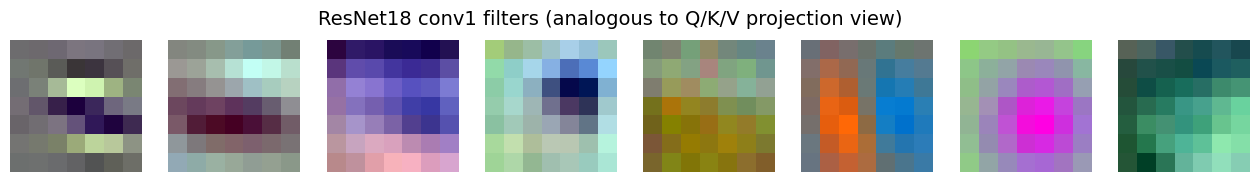

In [9]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# --- 1️⃣ Inspect the first convolution layer (analogy to QKV weights) ---
conv1_w = asl_resnet18.conv1.weight.detach().cpu().numpy()  # [64, 3, 7, 7]
print("conv1 weight shape:", conv1_w.shape)

# We'll visualize the 3 RGB channel kernels of the first few filters
num_filters = 8
fig, axes = plt.subplots(1, num_filters, figsize=(2*num_filters, 2))
for i in range(num_filters):
    k = conv1_w[i]
    # Normalize to [0,1]
    k = (k - k.min()) / (k.max() - k.min() + 1e-8)
    # Convert 3×7×7 → 7×7×3 (RGB)
    axes[i].imshow(np.transpose(k, (1, 2, 0)))
    axes[i].axis("off")
fig.suptitle("ResNet18 conv1 filters (analogous to Q/K/V projection view)", fontsize=14)
plt.show()


layer2[0].conv1 weight shape: (128, 64, 3, 3)


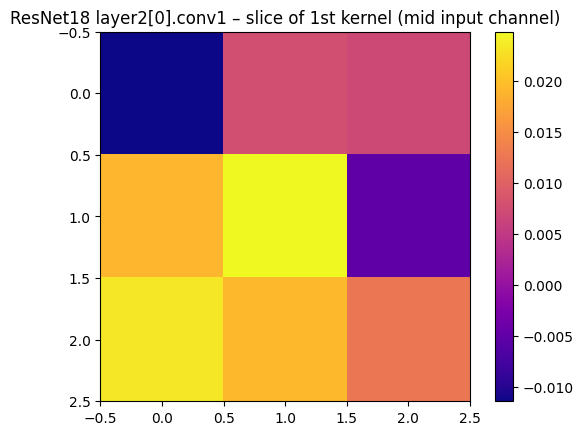

In [10]:


# --- 2️⃣ Inspect one mid-level convolution (e.g., layer2.0.conv1) ---
layer = asl_resnet18.layer2[0].conv1
w = layer.weight.detach().cpu().numpy()
print("layer2[0].conv1 weight shape:", w.shape)

# Visualize one channel slice (middle input channel)
mid_in = w.shape[1] // 2
plt.imshow(w[0, mid_in], cmap="plasma")
plt.title("ResNet18 layer2[0].conv1 – slice of 1st kernel (mid input channel)")
plt.colorbar()
plt.show()


layer3[0].conv2 weight shape: (256, 256, 3, 3)


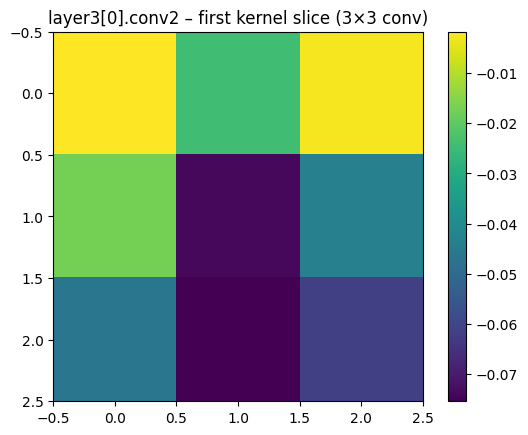

In [11]:


# --- 3️⃣ Analogy to the “pool_q kernel view”: visualize 3×3 conv kernels ---
layer3_conv = asl_resnet18.layer3[0].conv2
w3 = layer3_conv.weight.detach().cpu().numpy()
print("layer3[0].conv2 weight shape:", w3.shape)

# Middle slice of first kernel
plt.imshow(w3[0, 0], cmap="viridis")
plt.title("layer3[0].conv2 – first kernel slice (3×3 conv)")
plt.colorbar()
plt.show()


fc weight shape: (30, 512)


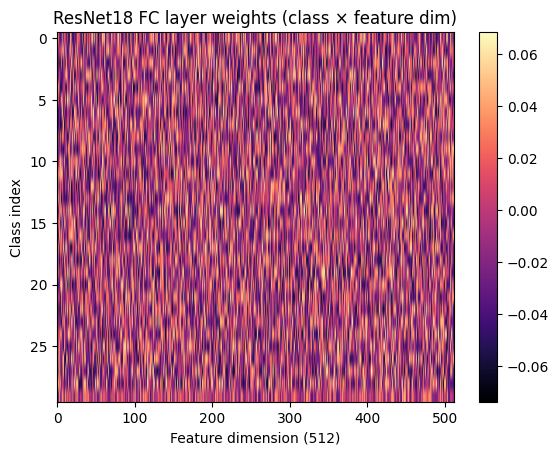

In [12]:


# --- 4️⃣ Final FC weights (analogy to “attention head projection”) ---
fc_w = asl_resnet18.fc.weight.detach().cpu().numpy()  # [num_classes, 512]
print("fc weight shape:", fc_w.shape)

plt.imshow(fc_w, cmap='magma', aspect='auto')
plt.title("ResNet18 FC layer weights (class × feature dim)")
plt.xlabel("Feature dimension (512)")
plt.ylabel("Class index")
plt.colorbar()
plt.show()


In [15]:
import torch
import onnx

# 1️⃣ Path for saving
onnx_path = "resnet18_asl_fp32.onnx"

# 2️⃣ Dummy input (standard ResNet size)
dummy_input = torch.randn(1, 3, 224, 224)

# 3️⃣ Export to ONNX
torch.onnx.export(
    final_asl_model,                           # model
    dummy_input,                               # example input
    onnx_path,                                 # where to save
    input_names=["input"],
    output_names=["output"],
    opset_version=18,                          # latest stable opset
    do_constant_folding=True,                  # optimize constants
    verbose=False
)

# 4️⃣ Validate ONNX structure
model_onnx = onnx.load(onnx_path)
onnx.checker.check_model(model_onnx)
print(f"✅ Successfully exported ASL ResNet18 to: {onnx_path}")

# 5️⃣ Quick info about structure
print(f"Inputs: {[inp.name for inp in model_onnx.graph.input]}")
print(f"Outputs: {[out.name for out in model_onnx.graph.output]}")
print(f"Number of nodes in ONNX graph: {len(model_onnx.graph.node)}")


✅ Successfully exported ASL ResNet18 to: resnet18_asl_fp32.onnx
Inputs: ['input']
Outputs: ['output']
Number of nodes in ONNX graph: 69


In [16]:
import onnxruntime as ort
import numpy as np

session = ort.InferenceSession(onnx_path, providers=["CPUExecutionProvider"])
input_name = session.get_inputs()[0].name

dummy = np.random.randn(1, 3, 224, 224).astype(np.float32)
output = session.run(None, {input_name: dummy})[0]
print("✅ ONNX inference OK. Output shape:", output.shape)


✅ ONNX inference OK. Output shape: (1, 30)
